## Project 1 - Programming for Data Analysis

Due: 4th of December 2022.

__Requirements:__ _For this project you must create a data set by simulating a real-world phenomenon of your choosing._

__Background:__
The aim of this report was to create a dataset assessing the change in cigarette use and if a link exists between usage and illness between 2019 and 2022 within Ireland.
1. Creating a data frame of unique respondents
2. Categorical variables
4. Binary variables
3. Numeric data
4. Results
5. Discussion
6. References



<em><strong>Load Libraries</strong></em>

In [23]:
import numpy as np

In [24]:
import matplotlib.pyplot as plt

In [25]:
%pip install seaborn

In [26]:
import pandas as pd

In [27]:
import seaborn as sns

<em><strong>Create Variables</strong></em>

In [97]:
dataset = 1000
response_id = np.random.randint(1, 1000, dataset)
df = pd.DataFrame({"Response ID":response_id})

Categorical variables

In [98]:
df['Residence'] = np.random.choice(["City","Town", "Rural"], size=dataset, p=[.37,.42,.21])
df['Year'] = np.random.choice([2018, 2019, 2020, 2021, 2022], size=dataset, p=[.2,.2,.2,.2,.2])
df['Frequency'] = np.random.randint(1,10 , dataset)
df['Age'] = np.random.randint(low=17, high=60, size=dataset)
df.head()

,Response ID,Residence,Year,Frequency,Age
0,735,City,2020,4,50
1,156,Town,2022,1,34
2,859,Rural,2019,5,31
3,820,Rural,2021,7,21
4,820,Town,2018,7,31


<em><strong>Binary Varibles</strong></em>

In [107]:
df['Gender'] = np.random.choice(["Male","Female"], size=dataset)
df['Illness'] = np.random.choice(["Yes","No"], size=dataset)
df['Type'] = np.random.choice(["Tobacco","e-Cigarettes"], size=dataset, p=[.695,.305])
df.tail()

,Response ID,Residence,Year,Frequency,Age,Gender,Type,Cost,Salary,Illness
995,348,Rural,2020,3,26,Male,Tobacco,38.24,7800.00,No
996,408,Rural,2020,2,39,Female,Tobacco,34.58,7800.00,No
997,478,Rural,2022,7,27,Male,Tobacco,69.26,19938.89,Yes
998,871,Town,2018,1,49,Female,Tobacco,19.84,4900.00,Yes
999,916,Town,2022,8,48,Male,e-Cigarettes,104.34,39965.11,Yes


<em><strong>Numeric Varibles</strong></em>

In [108]:
cost = []
for row in df['Frequency']:
        if row < 2 :    cost.append(float(np.random.uniform(10,20,1)))
        elif row < 4  : cost.append(float(np.random.uniform(21,40,1)))
        elif row < 6 : cost.append(float(np.random.uniform(41,60,1)))
        elif row < 8 :  cost.append(float(np.random.uniform(61,80,1)))        
        else:          cost.append(float(np.random.uniform(81,110,1)))

In [127]:
df['Cost'] = cost

In [128]:
df.loc[df['Frequency'] <= 5, 'Salary'] = df['Frequency']*df['Age']*100 
df.loc[df['Frequency'] > 5, 'Salary'] = df['Frequency']*df['Age']*100 + df['Cost']*15
df.head()

,Response ID,Residence,Year,Frequency,Age,Gender,Type,Cost,Salary,Illness
0,735,City,2020,4,50,Female,e-Cigarettes,46.487853,20000.000000,Yes
1,156,Town,2022,1,34,Female,Tobacco,15.957405,3400.000000,No
2,859,Rural,2019,5,31,Male,e-Cigarettes,50.807582,15500.000000,No
3,820,Rural,2021,7,21,Male,e-Cigarettes,67.087950,15706.319244,Yes
4,820,Town,2018,7,31,Male,Tobacco,67.179350,22707.690249,Yes


In [134]:
df['Cost']= df['Cost'].apply(lambda x:round(x,2))
df['Salary']= df['Salary'].apply(lambda x:round(x,2))
df.head()

,Response ID,Residence,Year,Frequency,Age,Gender,Type,Cost,Salary,Illness
0,735,City,2020,4,50,Female,e-Cigarettes,46.49,20000.00,Yes
1,156,Town,2022,1,34,Female,Tobacco,15.96,3400.00,No
2,859,Rural,2019,5,31,Male,e-Cigarettes,50.81,15500.00,No
3,820,Rural,2021,7,21,Male,e-Cigarettes,67.09,15706.32,Yes
4,820,Town,2018,7,31,Male,Tobacco,67.18,22707.69,Yes


In [135]:
df['Cost'] =np.float32(df['Cost'])
df['Salary'] = np.float32(df['Salary'])

In [136]:
print(df.dtypes)

Response ID      int32
Residence       object
Year             int32
Frequency        int32
Age              int32
Gender          object
Type            object
Cost           float32
Salary         float32
Illness         object
dtype: object


<em><strong>Results</strong></em>

In [183]:
df.describe().T.apply(lambda x:round(x,2))

,count,mean,std,min,25%,50%,75%,max
Response ID,1000.0,501.16,284.09,6.00,265.75,492.5,751.25,999.00
Year,1000.0,2019.97,1.41,2018.00,2019.00,2020.0,2021.00,2022.00
Frequency,1000.0,5.02,2.56,1.00,3.00,5.0,7.00,9.00
Age,1000.0,38.46,12.05,17.00,28.00,39.0,49.00,59.00
Cost,1000.0,56.86,28.05,10.04,33.38,54.9,78.17,109.96
Salary,1000.0,19960.10,12639.55,1700.00,9400.00,17774.0,28190.57,53847.43


In [184]:
df1= df.loc[:, ['Salary','Cost','Type', 'Illness']]
df1.groupby(['Type', 'Illness']).agg([np.mean, np.std]).apply(lambda x:round(x,2))
#df1.groupby(['Type', 'Illness']).agg([np.mean, np.std]).apply(lambda x:round(x,2))

Salary                 Cost       
                              mean       std       mean    std
Type         Illness                                          
Tobacco      No       19341.019531  12628.13  56.450001  28.02
             Yes      20402.480469  12880.43  56.919998  28.64
e-Cigarettes No       19929.089844  12507.82  56.020000  28.36
             Yes      20437.179688  12285.97  58.509998  26.63

In [160]:
plt.figure(figsize=[14, 7])
df2= df.loc[:, ['Salary','Cost','Type', 'Gender']]
df2.groupby(['Type', 'Gender']).agg([np.mean, np.std]).round(2)

Salary                 Cost       
                             mean       std       mean    std
Type         Gender                                          
Tobacco      Female  19943.740234  13020.81  56.939999  28.73
             Male    19777.990234  12474.32  56.400002  27.87
e-Cigarettes Female  20665.949219  12251.42  58.660000  26.44
             Male    19783.699219  12506.10  56.119999  28.35

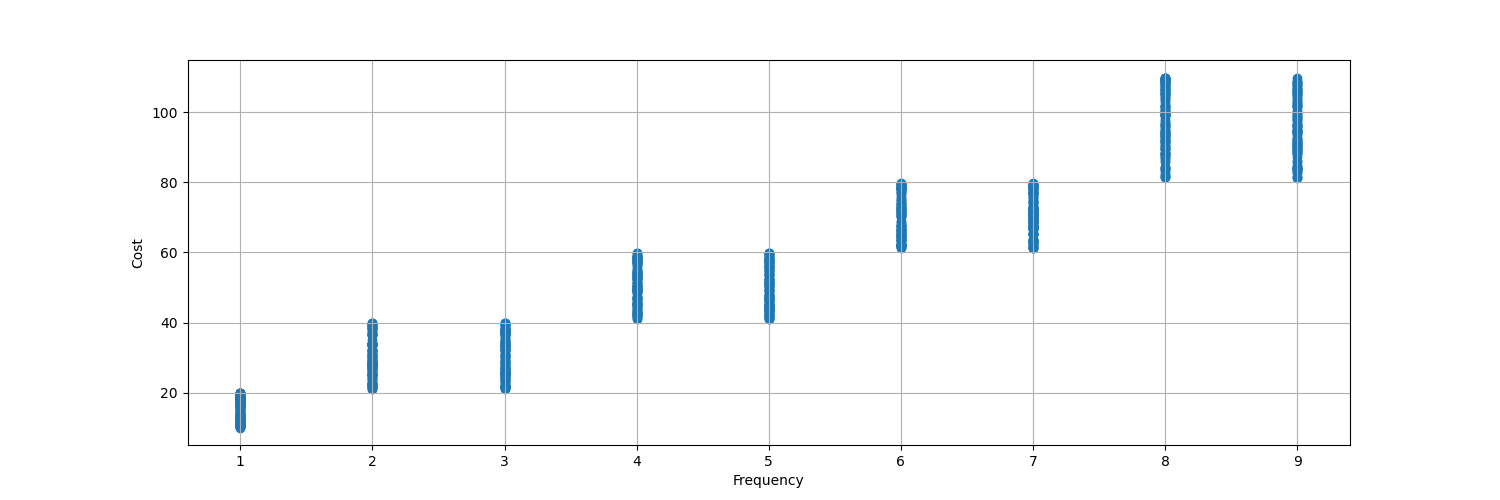

In [161]:
plt.subplots(figsize=(15,5))
plt.scatter(df['Frequency'],df['Cost'])
plt.xlabel('Frequency')
plt.ylabel('Cost')
plt.grid()
plt.show()

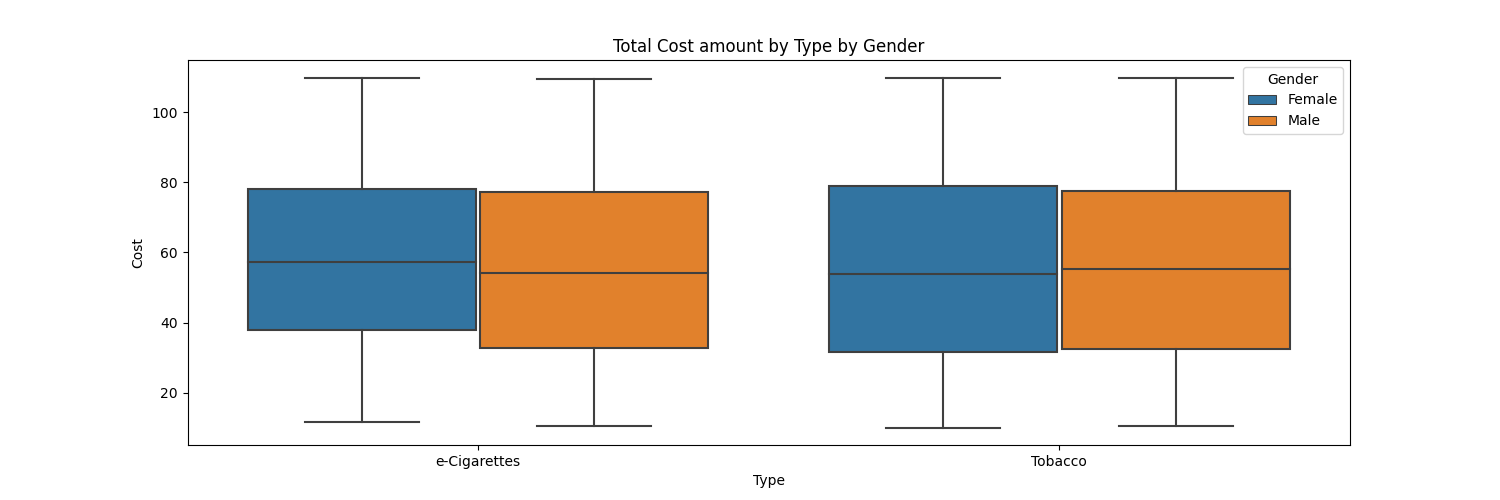

In [162]:
sns.boxplot(x="Type",y="Cost" ,hue="Gender",data=df) 
plt.title("Total Cost amount by Type by Gender")
plt.show()

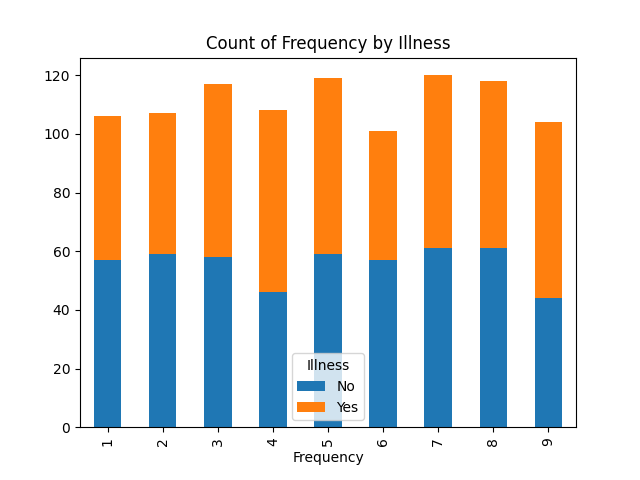

In [169]:
df.groupby(['Frequency', 'Illness']).size().unstack().plot(kind='bar', stacked=True)
plt.title("Count of Frequency by Illness")
plt.show()

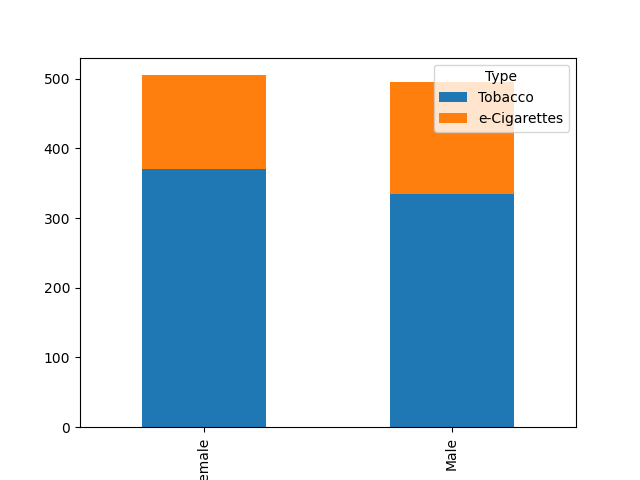

In [164]:
df.groupby(['Gender', 'Type']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

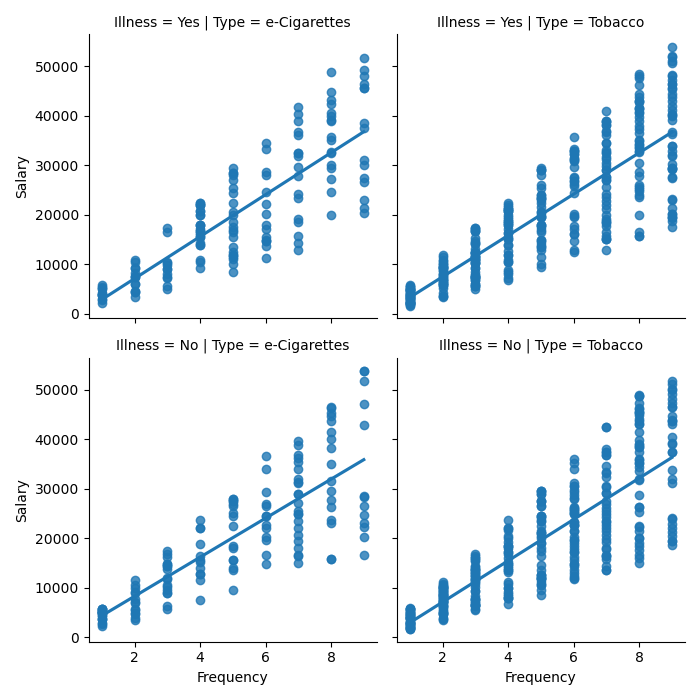

In [188]:
sns.lmplot(x="Frequency", y="Salary", col="Type", row="Illness",ci=False,data=df, height=3.5, aspect =1)
plt.show()